# Proyecto
### Eliú Moreno Ramirez
#### Modelo de Fitzhugh-Nagumo

El cerebro es un sistema complejo. Para entender esta complejidad no es posible prescindir de los modelos matemáticos en el estudio de las unidades funcionales que lo componen. Un buen ejemplo de este tipo de modelos es el estudio de la sinápsis neuronal a través del modelo de Fitzhugh-Nagumo.
Las células nerviosas o neuronas están constituidas fundamentalmente de tres partes: el cuerpo neuronal o soma donde se procesa toda la información, una prolongación con pocas ramificaciones llamada axón como hilo conductor, y por último unas zonas muy ramificadas conocidas como dendritas, encargadas de ponerse en contacto con otras células nerviosas.
En un principio las neuronas están inactivas hasta el momento en el que alcanzan un nivel crítico debido a las entradas a través de las dendritas y en ese momento reaccionan amplificando este potencial.
###### Excitabilidad de la membrana celular
Las neuronas están cubiertas por una membrana compuesta de complejos protéinicos y lípidos orientados que forman estructuras encargadas del transporte de solutos y electrolitos, entre el interior y el exterior de la célula nerviosa. Entre estas están los llamados canales iónicos, que sirven para regular las corrientes iónicas transmembranales responsables de originar la formación de los trenes de espigas de voltaje llamado también impulso nervioso o potencial de acción; que son señales nerviosas. Los primeros estudios experimentales que se llevaron a cabo, fueron facilitados por el descubrimiento del axón gigante de una de las células que controlan la acción neuromotora del calamar, Hodgkin y Huxley relizaron sus análisis en dicho axón por tener un diámetro de medio milímetro.
Las características más sobresalientes del potencial de acción y su dinámica, fueron modeladas satisfactoriamente por Hodgkin y Huxley, con su sistema de cuatro ecuaciones diferenciales no lineales. A pesar de que todos los elementos allí involucrados, tienen un claro significado biofísico, sin embargo,la complejidad matemática dificulta enormemente su análisis. Con el afán de comprender la esencia de la dinámica del fenómeno de excitabilidad, FitzHugh construyó un sistema más simple (dos ecuaciones diferenciales). El sistema se represeta generalmente de la forma:

$\frac{dv}{dt}=E-v(v-v_1)(v-v_2)-w$

$\frac{dw}{dt}=\epsilon (v-cw)$

Donde $v$ es el potencial de membrana; $w$ es la conductancia de iones dependiendo del voltaje; $E$ es el voltaje externo aplicado; $c$ y $\epsilon$ son constantes. Los parámetros $v_1$ y $v_2$ representan la influencia del potencial sobre la tasa de cambio de este potencial.

Ahora bien el parámetro $E$ representa el estímulo externo que recibe una neurona, ya sea de la sinapsis de otras células o de una excitación artificial impuesta por el experimentador o de otra naturaleza. El parámetro $c$ representa, en cierto sentido, la capacidad de recuperación del sistema (neurona) ante perturbaciones, es decir, su capacidad para regresar al estado de equilibrio o base, como se suele nombrar en fisiología. Este puede tener uno, dos o tres puntos de equilibrio que dependerán de los parámetros elegidos.

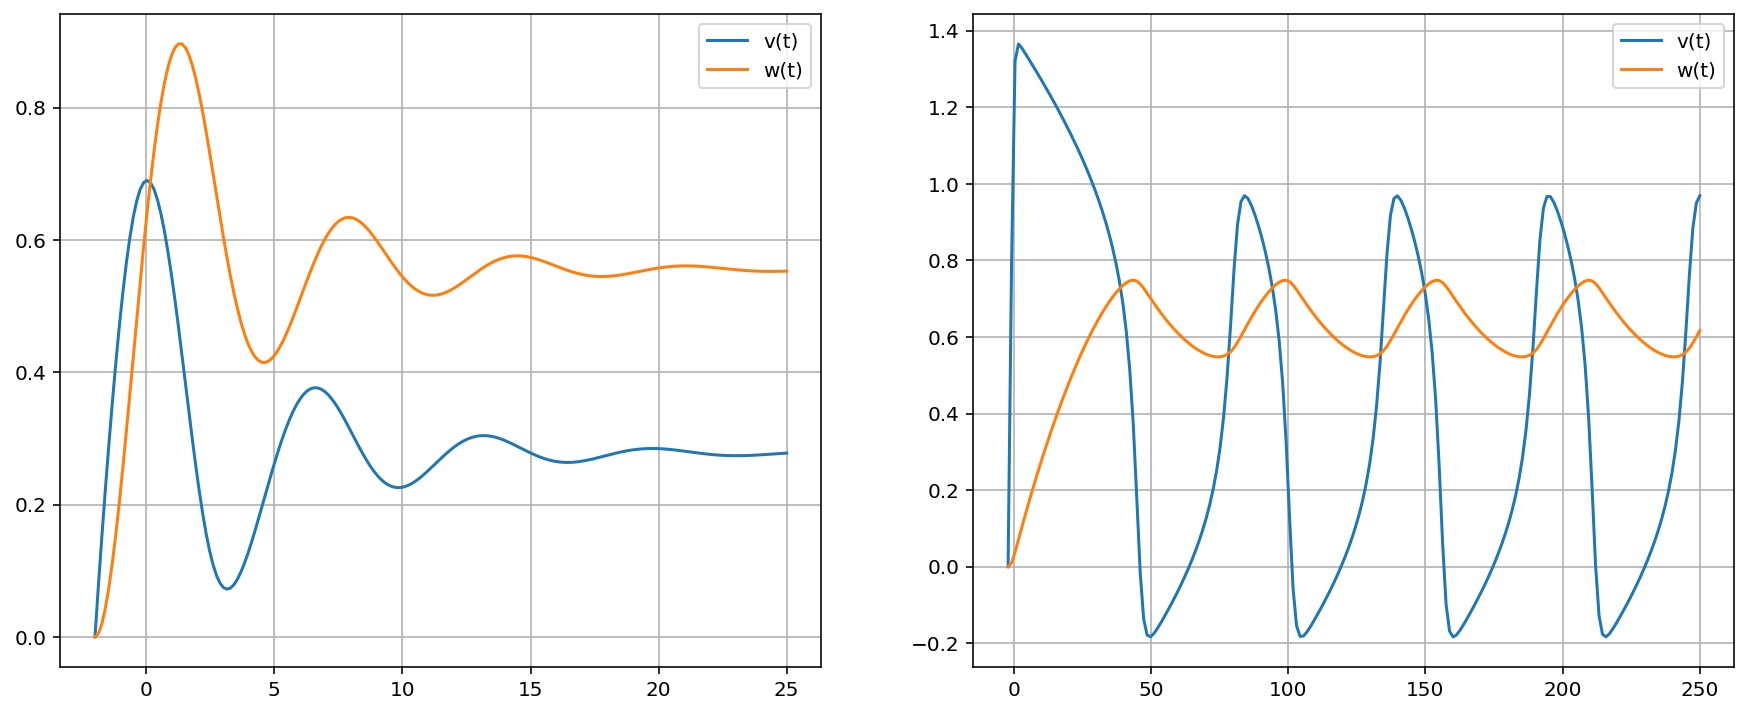

In [10]:
# Considerando el valor inicial como v=0,w=0, y algunos valores para v1,v2,E,c,epsilon
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt
def f(vw,t):
    v,w=vw
    return [E-v*(v-v1)*(v-v2)-w,epsilon*(v-0.5*w)]
vw0=[0,0]
t=np.linspace(-2,25,200)
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(15,6))
v1=.5
v2=1
E=.6
c=.5
epsilon=1
vw_t1=integrate.odeint(f,vw0,t)
ax1.plot(t,vw_t1[:,0],label='v(t)')
ax1.plot(t,vw_t1[:,1],label='w(t)')
ax1.legend()
ax1.grid()
t=np.linspace(-2,250,200)
v1=.3
v2=1
E=.6
c=1
epsilon=0.02
vw_t2=integrate.odeint(f,vw0,t)
ax2.plot(t,vw_t2[:,0],label='v(t)')
ax2.plot(t,vw_t2[:,1],label='w(t)')
ax2.grid()
ax2.legend()

#### Espacio fase

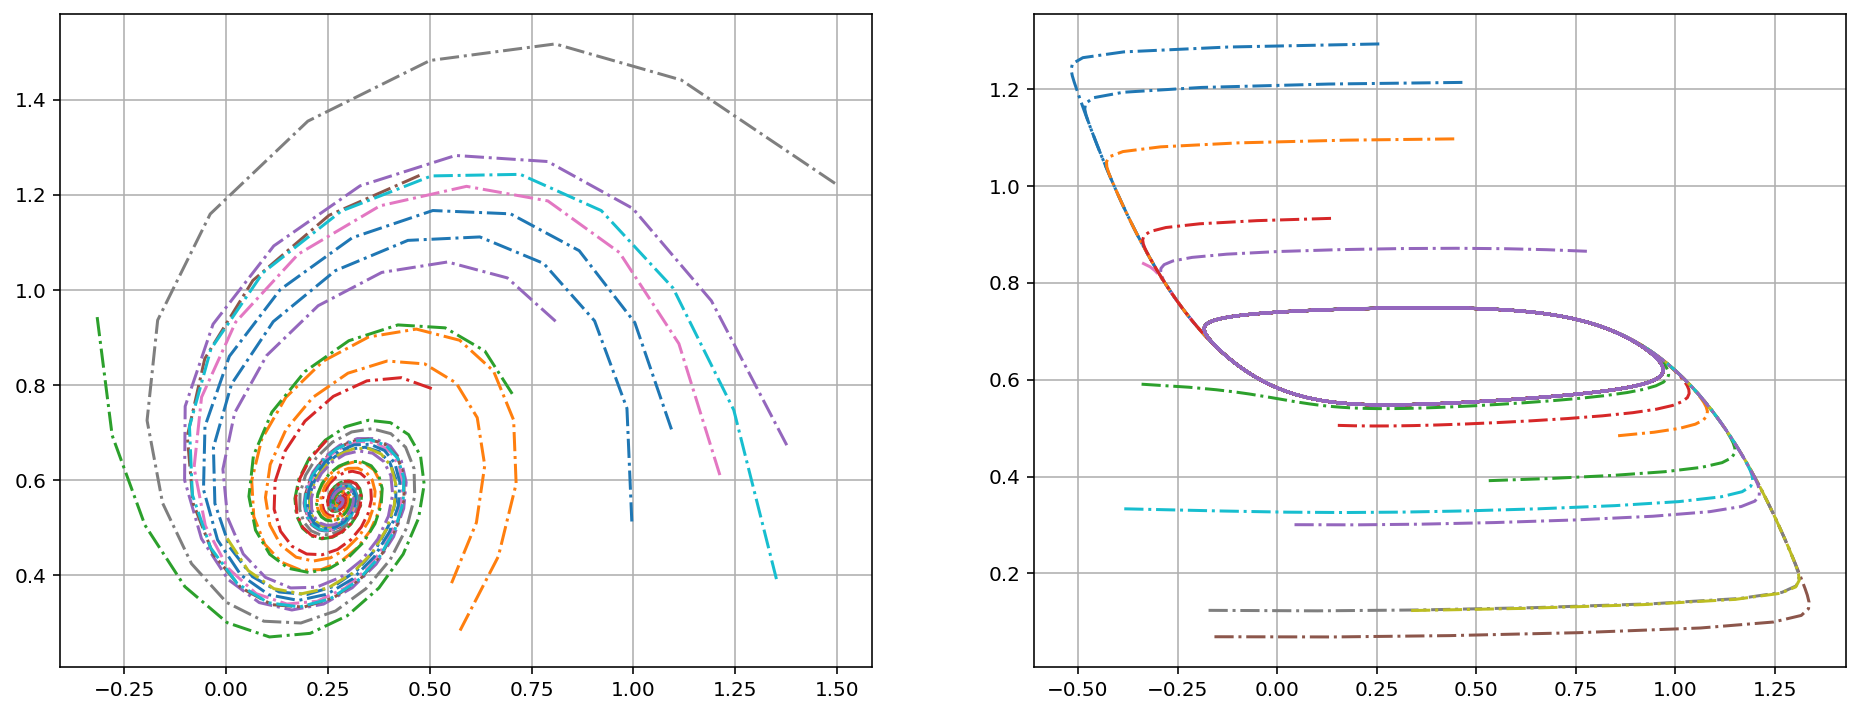

In [11]:
# Para que se viera más claro se coloco un ciclo con condiciones iniciales aleatorias y los parametros para las figuras previas
import random
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(16,6))
ax1.grid()
for i in range (15):
    v1=.5
    v2=1
    E=.6
    c=.5
    epsilon=1
    t=np.linspace(-50,300,1000)
    vw0[0]=random.uniform(-.5,1.5)
    vw0[1]=random.uniform(0,1.3)
    vw_t=integrate.odeint(f,vw0,t)
    ax1.plot(vw_t[:,0],vw_t[:,1],'-.')
ax2.grid()
for i in range(15):
    v1=.3
    v2=1
    E=.6
    c=1
    epsilon=0.02
    t=np.linspace(-50,500,1000)
    vw0[0]=random.uniform(-.5,1.5)
    vw0[1]=random.uniform(0,1.3)
    vw_t=integrate.odeint(f,vw0,t)
    ax2.plot(vw_t[:,0],vw_t[:,1],'-.')

Notamos que la imagen de la izquierda resulta con un punto de equilibrio en la forma de extractor lo cual no parece extraño ya que si analizamos la gráficas $v(t)$ y w$(t)$ que corresponden a esos parámetros estos empezaran a tender un valor constante, mientras que por el contrario para la segunda figura del espacio fase este es como si fuera un ciclo es decir estados de equilibrio inestables y que concuerda con la gráfica de $v(t)$ y $w(t)$ ya que estas siempre se mantedrán oscilando.

<AxesSubplot:title={'center':'$\\frac{d}{d v} w{\\left(v \\right)} = \\frac{0.02 v - 0.01 w{\\left(v \\right)}}{- v \\left(v - 1\\right) \\left(v - 0.3\\right) - w{\\left(v \\right)} + 0.6}$'}>

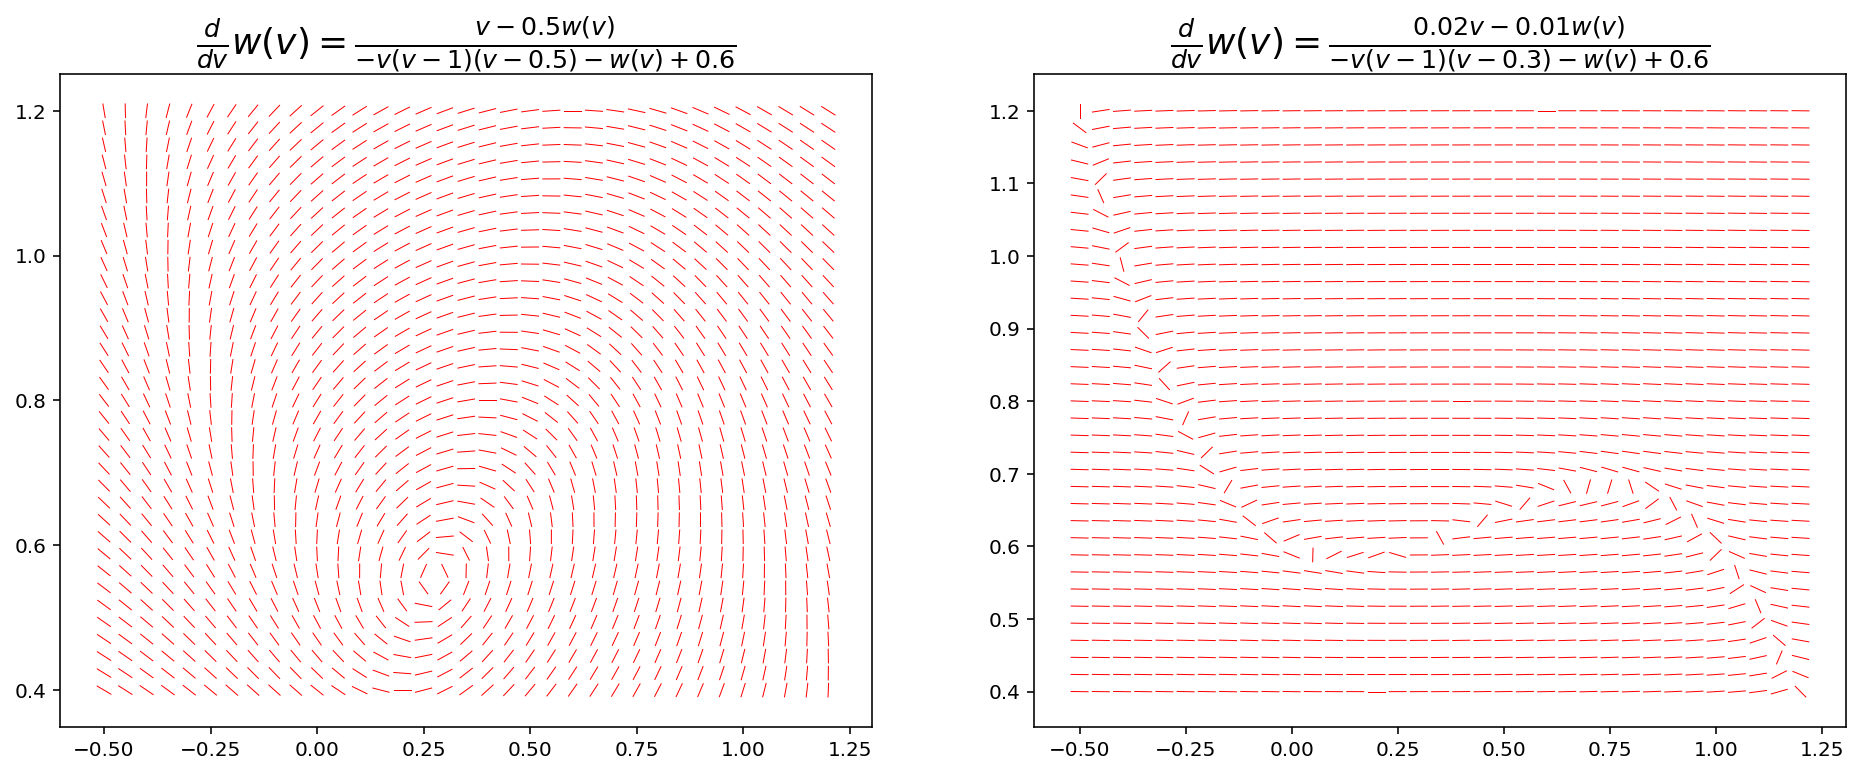

In [12]:
import sympy
v=sympy.symbols('v')
w=sympy.Function('w')
def plot_direction_field(x,y_x,f_xy,x_lim=(-.5,1.2),y_lim=(0.4,1.2),ax=None):
    f_np=sympy.lambdify((x,y_x),f_xy,'numpy')
    x_vec=np.linspace(x_lim[0],x_lim[1],35)
    y_vec=np.linspace(y_lim[0],y_lim[1],35)
    if ax is None:
        _, ax=plt.subplots(figsize=(4,4))
    dx=x_vec[1]-x_vec[0]
    dy=y_vec[1]-y_vec[0]
    for m,xx in enumerate(x_vec):
        for n,yy in enumerate(y_vec):
            Dy=f_np(xx,yy)*dx
            Dx=0.8*dx**2/np.sqrt(dx**2+Dy**2)
            Dy=0.8*Dy*dy/np.sqrt(dx**2+Dy**2)
            ax.plot([xx-Dx/2,xx+Dx/2],[yy-Dy/2,yy+Dy/2],'r',lw=0.5)
    ax.axis('tight')
    ax.set_title(r"$%s$"%
                 (sympy.latex(sympy.Eq(w(x).diff(x),f_xy))),
                    fontsize=18)
    return ax
fig,axes=plt.subplots(1,2,figsize=(16,6))
v1=.5
v2=1
E=.6
c=.5
epsilon=1
plot_direction_field(v,w(v),(epsilon*(v-0.5*w(v)))/(E-v*(v-v1)*(v-v2)-w(v)),ax=axes[0])
v1=.3
v2=1
E=.6
c=1
epsilon=0.02
plot_direction_field(v,w(v),(epsilon*(v-0.5*w(v)))/(E-v*(v-v1)*(v-v2)-w(v)),ax=axes[1])

Bibliografía: 
    
[1]Jasmidt Vera C., Yineth Medina A. "Modelo Fitzhugh-Nagumo y las redes neuronales" (2007)

[2]Gregorio Castillo Q. "Análisis cualitativo del modelo de FitzHugh-Nagumo" (2006)

[3]Marco Vásquez W., Salzar Rojas N., Castillo Pereda E., Saenz Tolay M. "ANALISIS CUALITATIVO Y SIMULACIÓN COMPUTACIONAL DEL PLANO FASE DEL MODELO NEURONAL DE FITZHUGH-NAGUMO" (s.f)

